# Pneumonia Detection Using CNN and Transfer Learning on Chest X-Ray Images
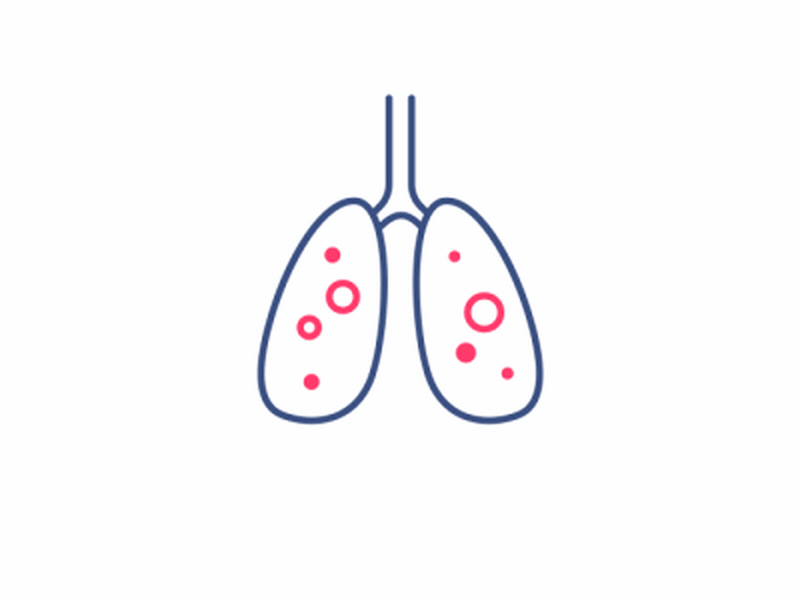

## Project Overview
This project focuses on the development of an accurate and efficient deep learning model for the automatic detection of pneumonia from chest X-ray images. The primary goal is to assist healthcare professionals in making timely and informed diagnosis and treatment decisions.

---

### About Me
**Shuvendu Pritam Das**  
- **Email:** [23mt0389@iitism.ac.in](mailto:23mt0389@iitism.ac.in)  
- **LinkedIn:** [LinkedIn Profile](https://www.linkedin.com/in/shuvendupritamdas)  
- **GitHub:** [GitHub Profile](https://github.com/SPritamDa
)  

---


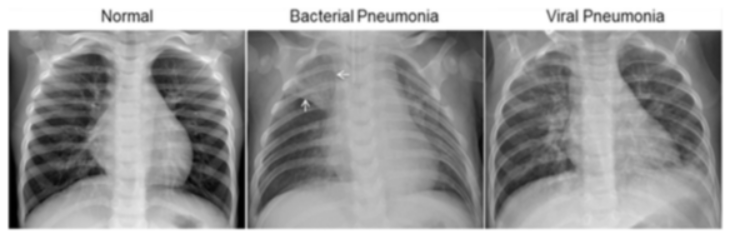

### Dataset
The dataset used in this project is sourced from [Kaggle’s Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia), comprising:
- **Total Images:** Over 5,000 chest X-ray images.
- **Classes:** 
  - Normal
  - Pneumonia (Bacterial and Viral)

---

### Objective
To develop a deep learning model that can accurately and efficiently detect pneumonia from chest X-ray images, ultimately aiding in prompt diagnosis and treatment.

---

### Methods
1. **Data Preprocessing**
   - Resizing images to a uniform size.
   - Applying data augmentation techniques to enhance the dataset.

2. **Model Architecture**
   - Utilizing Convolutional Neural Networks (CNNs) for feature extraction.
   - Implementing transfer learning using pre-trained models (e.g., ResNet, VGG16).

3. **Model Training**
   - Splitting the dataset into training, validation, and testing sets.
   - Fine-tuning hyperparameters for optimal performance.

4. **Evaluation**
   - Assessing performance using metrics such as accuracy, precision, recall, and F1 score.
   - Visualizing results through confusion matrices and ROC curves.

5. **Deployment**
   - Preparing the trained model for integration into applications for real-time pneumonia detection.
ration into applications for real-time detection
 healthcare professionals.


## Understanding Pneumonia


### What is Pneumonia?
Pneumonia is an inflammatory condition of the lungs primarily caused by infections, which can result from bacteria, viruses, fungi, or even chemical irritants. This condition leads to the alveoli (air sacs in the lungs) filling with fluid or pus, resulting in symptoms such as:

- Cough
- Fever
- Chills
- Difficulty breathing
- Chest pain

The severity of pneumonia can range from mild to life-threatening, especially in vulnerable populations like infants, the elderly, and individuals with compromised immune systems.

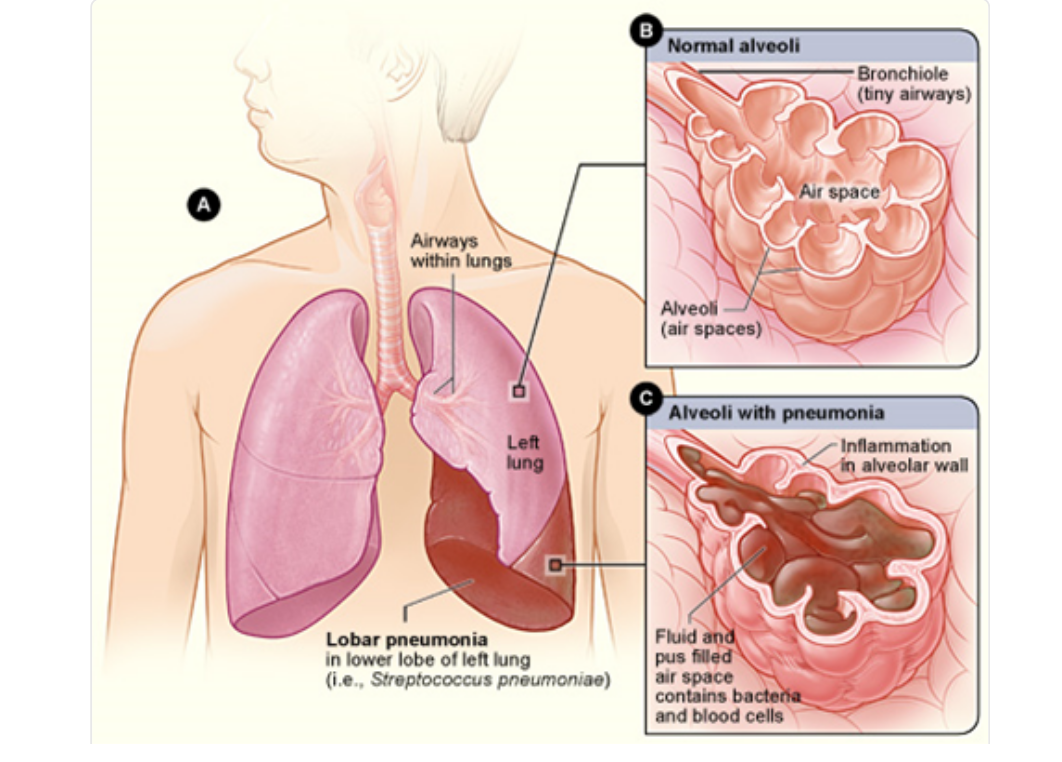

### Why Does Pneumonia Occur?
Pneumonia can develop for several reasons, including:

- **Infectious Agents:** Bacterial infections, particularly *Streptococcus pneumoniae*, are common, while viral infections such as influenza can also lead to pneumonia. Fungal infections are less common but can affect individuals with weakened immune systems.
- **Environmental Factors:** Exposure to pollutants, smoking, or inhalation of food or liquids can result in pneumonia.
- **Pre-existing Health Conditions:** Chronic diseases like asthma or diabetes can increase the risk of developing pneumonia.

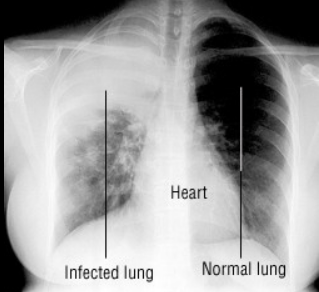

### How is Pneumonia Diagnosed?
Traditionally, pneumonia is diagnosed through:

1. **Clinical Evaluation:** Healthcare professionals assess symptoms and medical history.
2. **Laboratory Tests:** Blood tests and sputum cultures may be conducted to identify the causative agent.
3. **Imaging Techniques:** Chest X-rays are commonly used to visualize the lungs and confirm the presence of pneumonia.

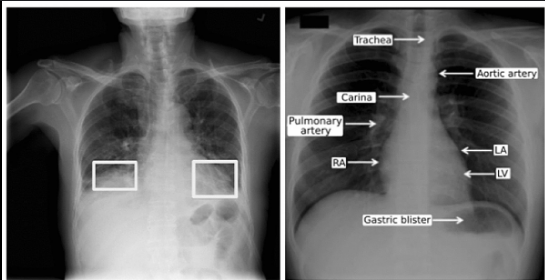

### Role of X-Ray in Pneumonia Detection
Chest X-rays are a crucial diagnostic tool in the evaluation of pneumonia, as they can:

- **Visualize Lung Conditions:** X-rays reveal areas of opacity in the lungs that indicate fluid or infection.
- **Differentiate Types of Pneumonia:** Radiologists can identify patterns suggesting different pneumonia types (e.g., lobar pneumonia vs. bronchopneumonia).
- **Monitor Progression:** X-rays can help track treatment effectiveness by comparing initial and follow-up images.

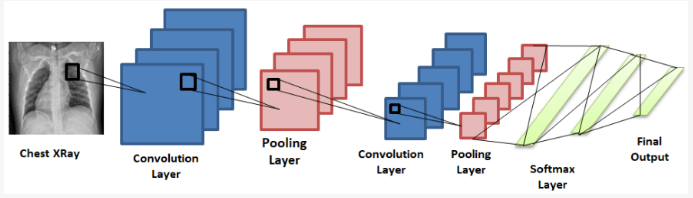

### Utilizing Convolutional Neural Networks (CNNs)
Convolutional Neural Networks (CNNs) are a class of deep learning models particularly effective for image analysis. They operate by:

1. **Feature Extraction:** CNNs automatically learn to extract features from images, such as edges, shapes, and textures, crucial for identifying pneumonia patterns.
2. **Classification:** After feature extraction, CNNs classify images into categories (e.g., pneumonia vs. no pneumonia) based on learned features.

#### Key Components of CNNs:
- **Convolutional Layers:** Apply filters to input images to capture spatial hierarchies.
- **Pooling Layers:** Downsample feature maps to reduce dimensionality while preserving essential features.
- **Fully Connected Layers:** 
- ggregate the extracted features to make predictions.

### Transfer Learning in Pneumonia Detection
Transfer learning is a technique where a pre-trained model, typically trained on a large dataset, is fine-tuned on a smaller, specific dataset. This approach offers several advantages:

- **Reduced Training Time:** By leveraging knowledge gained from a large dataset, transfer learning significantly reduces the time required to train the model on a new dataset.
- **Improved Performance:** Pre-trained models have learned useful features, enhancing the model's ability to generalize to new data.
- **Accessibility:** It allows practitioners to utilize powerful models even with limited data availability, making it particularly useful in medical imaging where labeled datasets may be scarce.

In the context of pneumonia detection, pre-trained models (e.g., ResNet, VGG, Inception) can be adapted to classify chest X-ray images, achieving high accuracy in identifying pneumonia and other lung conditions.

By integrating these advanced techniques, we can enhance the accuracy and efficiency of pneumonia detection, leading to better patient outcomes and timely medical interventions.


## Importing some required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import cv2
import os
import time
import sklearn

## Importing Datasets

#### Importing Training Datasets

In [8]:
folder = r"C:\Users\shuve\Desktop\Prep_fr_Bst\Data Science Role\Projects\Pneumonia Prediction\Dataset\chest_xray\train\NORMAL"

training_negative = []

for filename in os.listdir(folder):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        training_negative.append(img)

In [9]:
folder = r"C:\Users\shuve\Desktop\Prep_fr_Bst\Data Science Role\Projects\Pneumonia Prediction\Dataset\chest_xray\train\PNEUMONIA"

training_positive = []

for filename in os.listdir(folder):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        training_positive.append(img)

#### Check for balanced / imbalanced training datas set

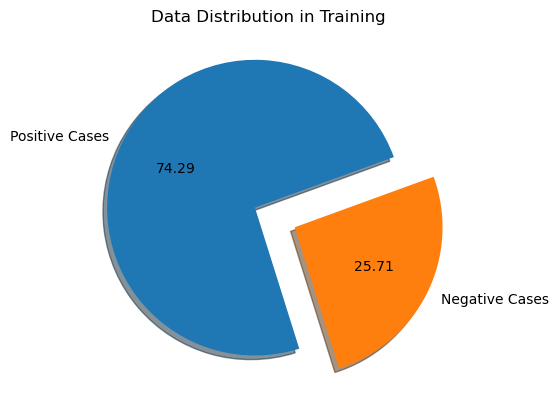

In [11]:
plt.pie([len(training_positive),len(training_negative)],labels=['Positive Cases','Negative Cases'], autopct=str('%.2f'),radius =1,shadow=True,startangle=20,explode=[0.1,0.2])
plt.title('Data Distribution in Training')
plt.show()

---
###### Remark: As there is a `imbalance` in the training dataset, we have to balance it by `Data Augumenataion` or `up sampling` or `down sampling` methods later.

#### Visualization of Training Data

##### Shape of Pneumonia Negative Cases

In [15]:
for i in range(5):
    print(training_negative[i].shape)

(1858, 2090, 3)
(1152, 1422, 3)
(1434, 1810, 3)
(1279, 1618, 3)
(1125, 1600, 3)


##### Shape of Pneumonia Positive Cases

In [17]:
for i in range(5):
    print(training_positive[i].shape)

(760, 1152, 3)
(768, 1072, 3)
(863, 1244, 3)
(940, 1242, 3)
(1280, 1488, 3)


---
###### Remark: As the `shapes` of each one is `different`, so it is better to resize for visualization.

In [19]:
training_positive_ = np.hstack((cv2.resize(training_positive[0],(500,500)),cv2.resize(training_positive[1],(500,500)),cv2.resize(training_positive[2],(500,500)),cv2.resize(training_positive[3],(500,500)),cv2.resize(training_positive[4],(500,500))))
training_negative_ = np.hstack((cv2.resize(training_negative[0], (500,500)),cv2.resize(training_negative[1], (500,500)),cv2.resize(training_negative[2],(500,500)),cv2.resize(training_negative[3],(500,500)),cv2.resize(training_negative[4],(500,500))))

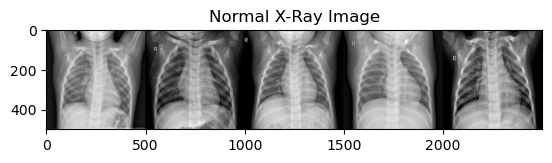

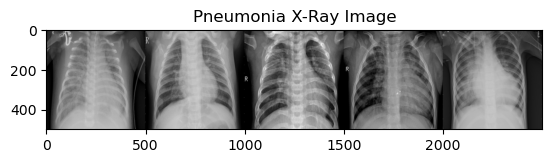

In [20]:
plt.imshow(training_negative_)
plt.title('Normal X-Ray Image')
plt.show()
plt.imshow(training_positive_)
plt.title('Pneumonia X-Ray Image')
plt.show()

### Importing Test Datasets

In [22]:
folder = r"C:\Users\shuve\Desktop\Prep_fr_Bst\Data Science Role\Projects\Pneumonia Prediction\Dataset\chest_xray\test\NORMAL"

test_negative = []

for filename in os.listdir(folder):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        test_negative.append(img)

In [23]:
folder = r"C:\Users\shuve\Desktop\Prep_fr_Bst\Data Science Role\Projects\Pneumonia Prediction\Dataset\chest_xray\test\PNEUMONIA"

test_positive = []

for filename in os.listdir(folder):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        test_positive .append(img)

### Importing Validation Datasets¶

In [25]:
folder = r"C:\Users\shuve\Desktop\Prep_fr_Bst\Data Science Role\Projects\Pneumonia Prediction\Dataset\chest_xray\val"

val_negative = []

for filename in os.listdir(folder):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        val_negative.append(img)

In [26]:
folder = r"C:\Users\shuve\Desktop\Prep_fr_Bst\Data Science Role\Projects\Pneumonia Prediction\Dataset\chest_xray\val"

val_positive = []

for filename in os.listdir(folder):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        val_positive .append(img)